In [1]:
import pandas as pd
df = pd.read_csv("mushroom.csv")
df.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [7]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

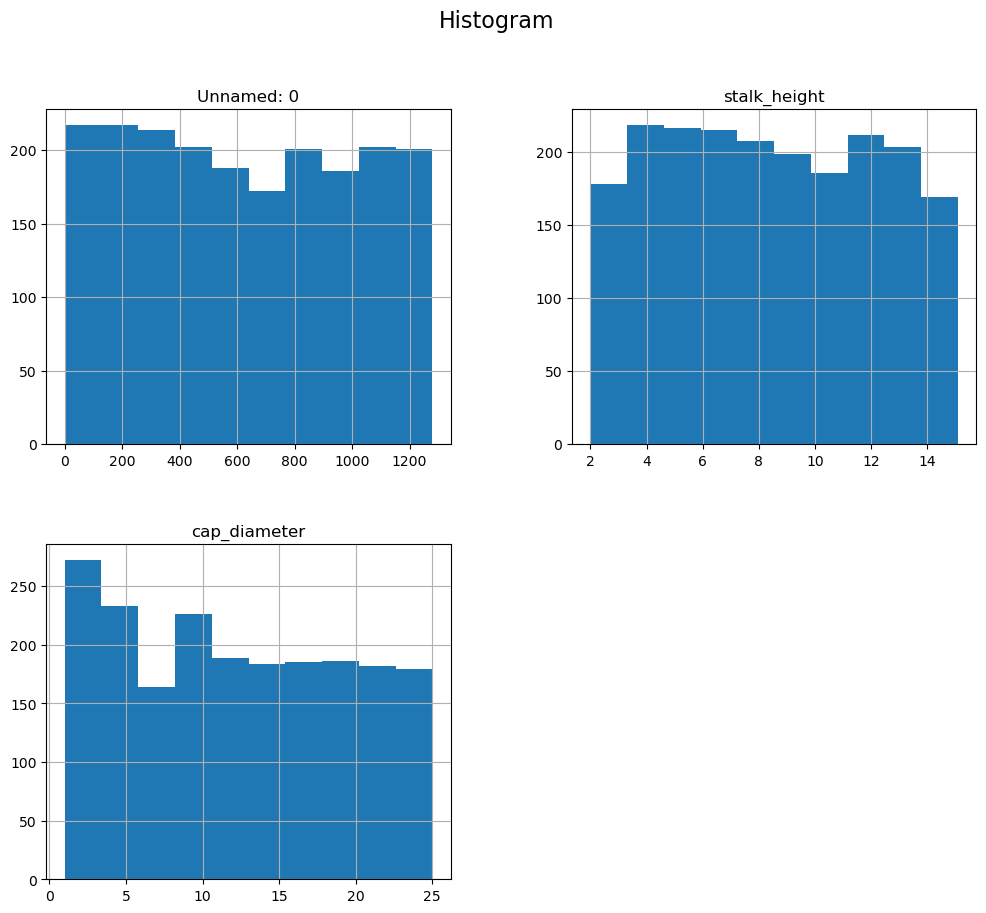

In [9]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(figsize=(12, 10))
plt.suptitle("Histogram", fontsize=16)
plt.show()

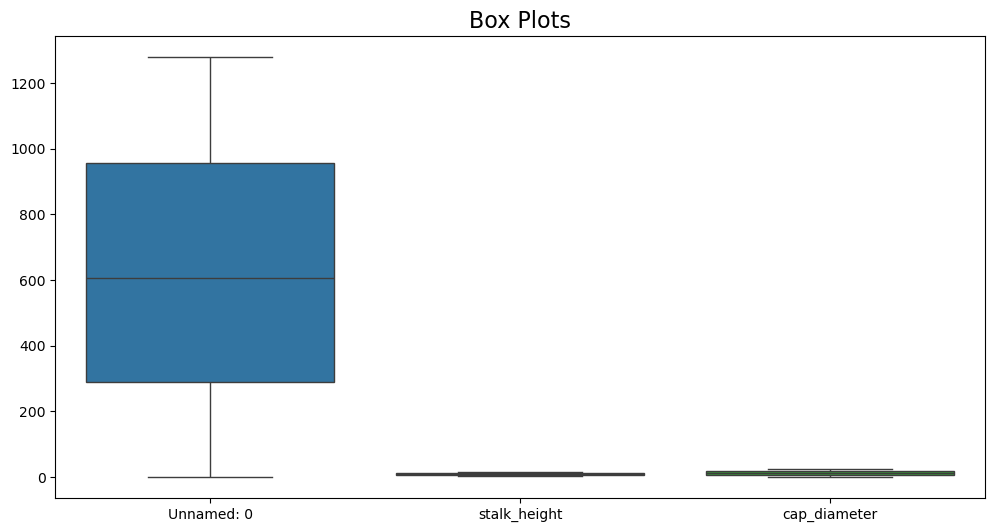

In [10]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Box Plots", fontsize=16)
plt.show()

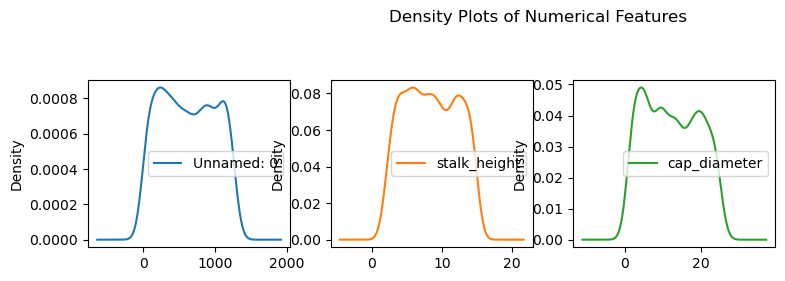

In [13]:
# Density plots for numerical features
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(12,10))
plt.suptitle('Density Plots of Numerical Features', y=0.95)
plt.show()

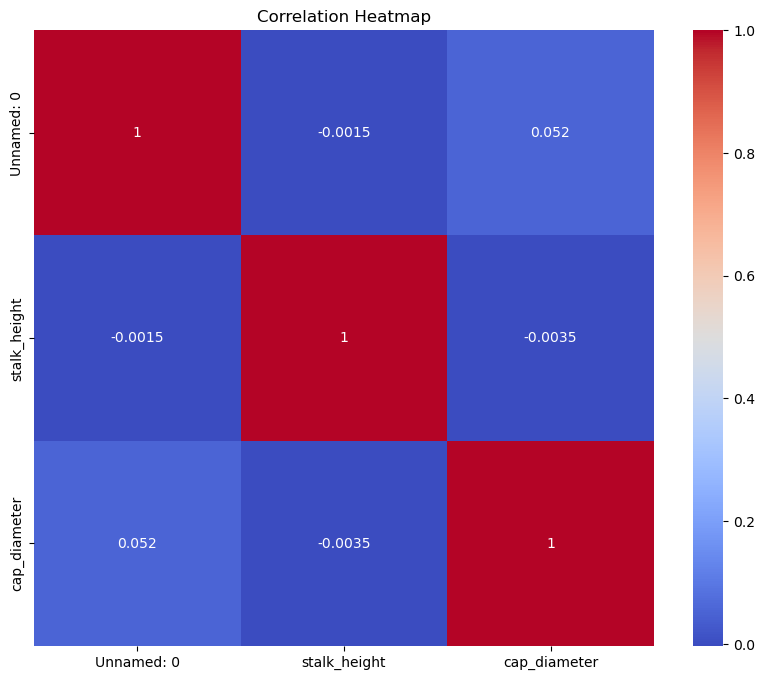

In [14]:
correlation_matrix = df.corr(numeric_only=True)

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
df = df.drop(columns=['Unnamed: 0'])  # Drop the unnecessary column

In [19]:
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target

In [21]:
cat_col = X.select_dtypes(include=['object']).columns

In [23]:
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for col in cat_col:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

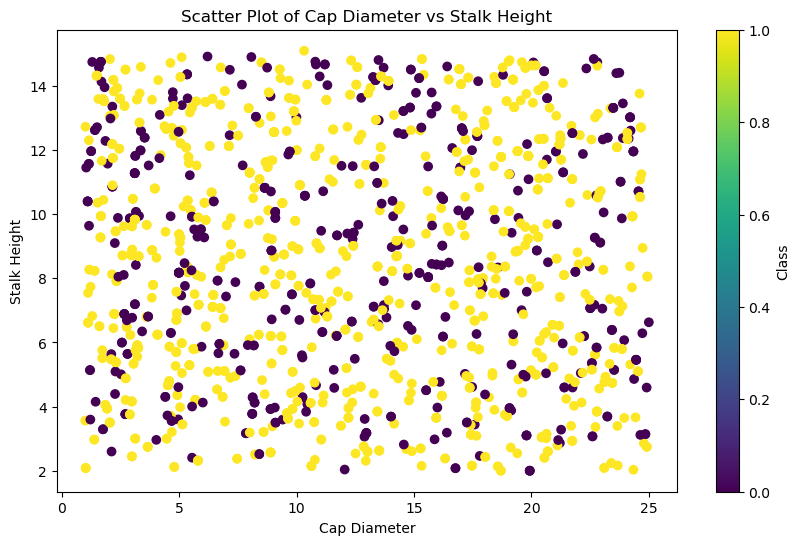

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['cap_diameter'], X_train['stalk_height'], c=LabelEncoder().fit_transform(y_train), cmap='viridis')
plt.xlabel('Cap Diameter')
plt.ylabel('Stalk Height')
plt.title('Scatter Plot of Cap Diameter vs Stalk Height')
plt.colorbar(label='Class')
plt.show()

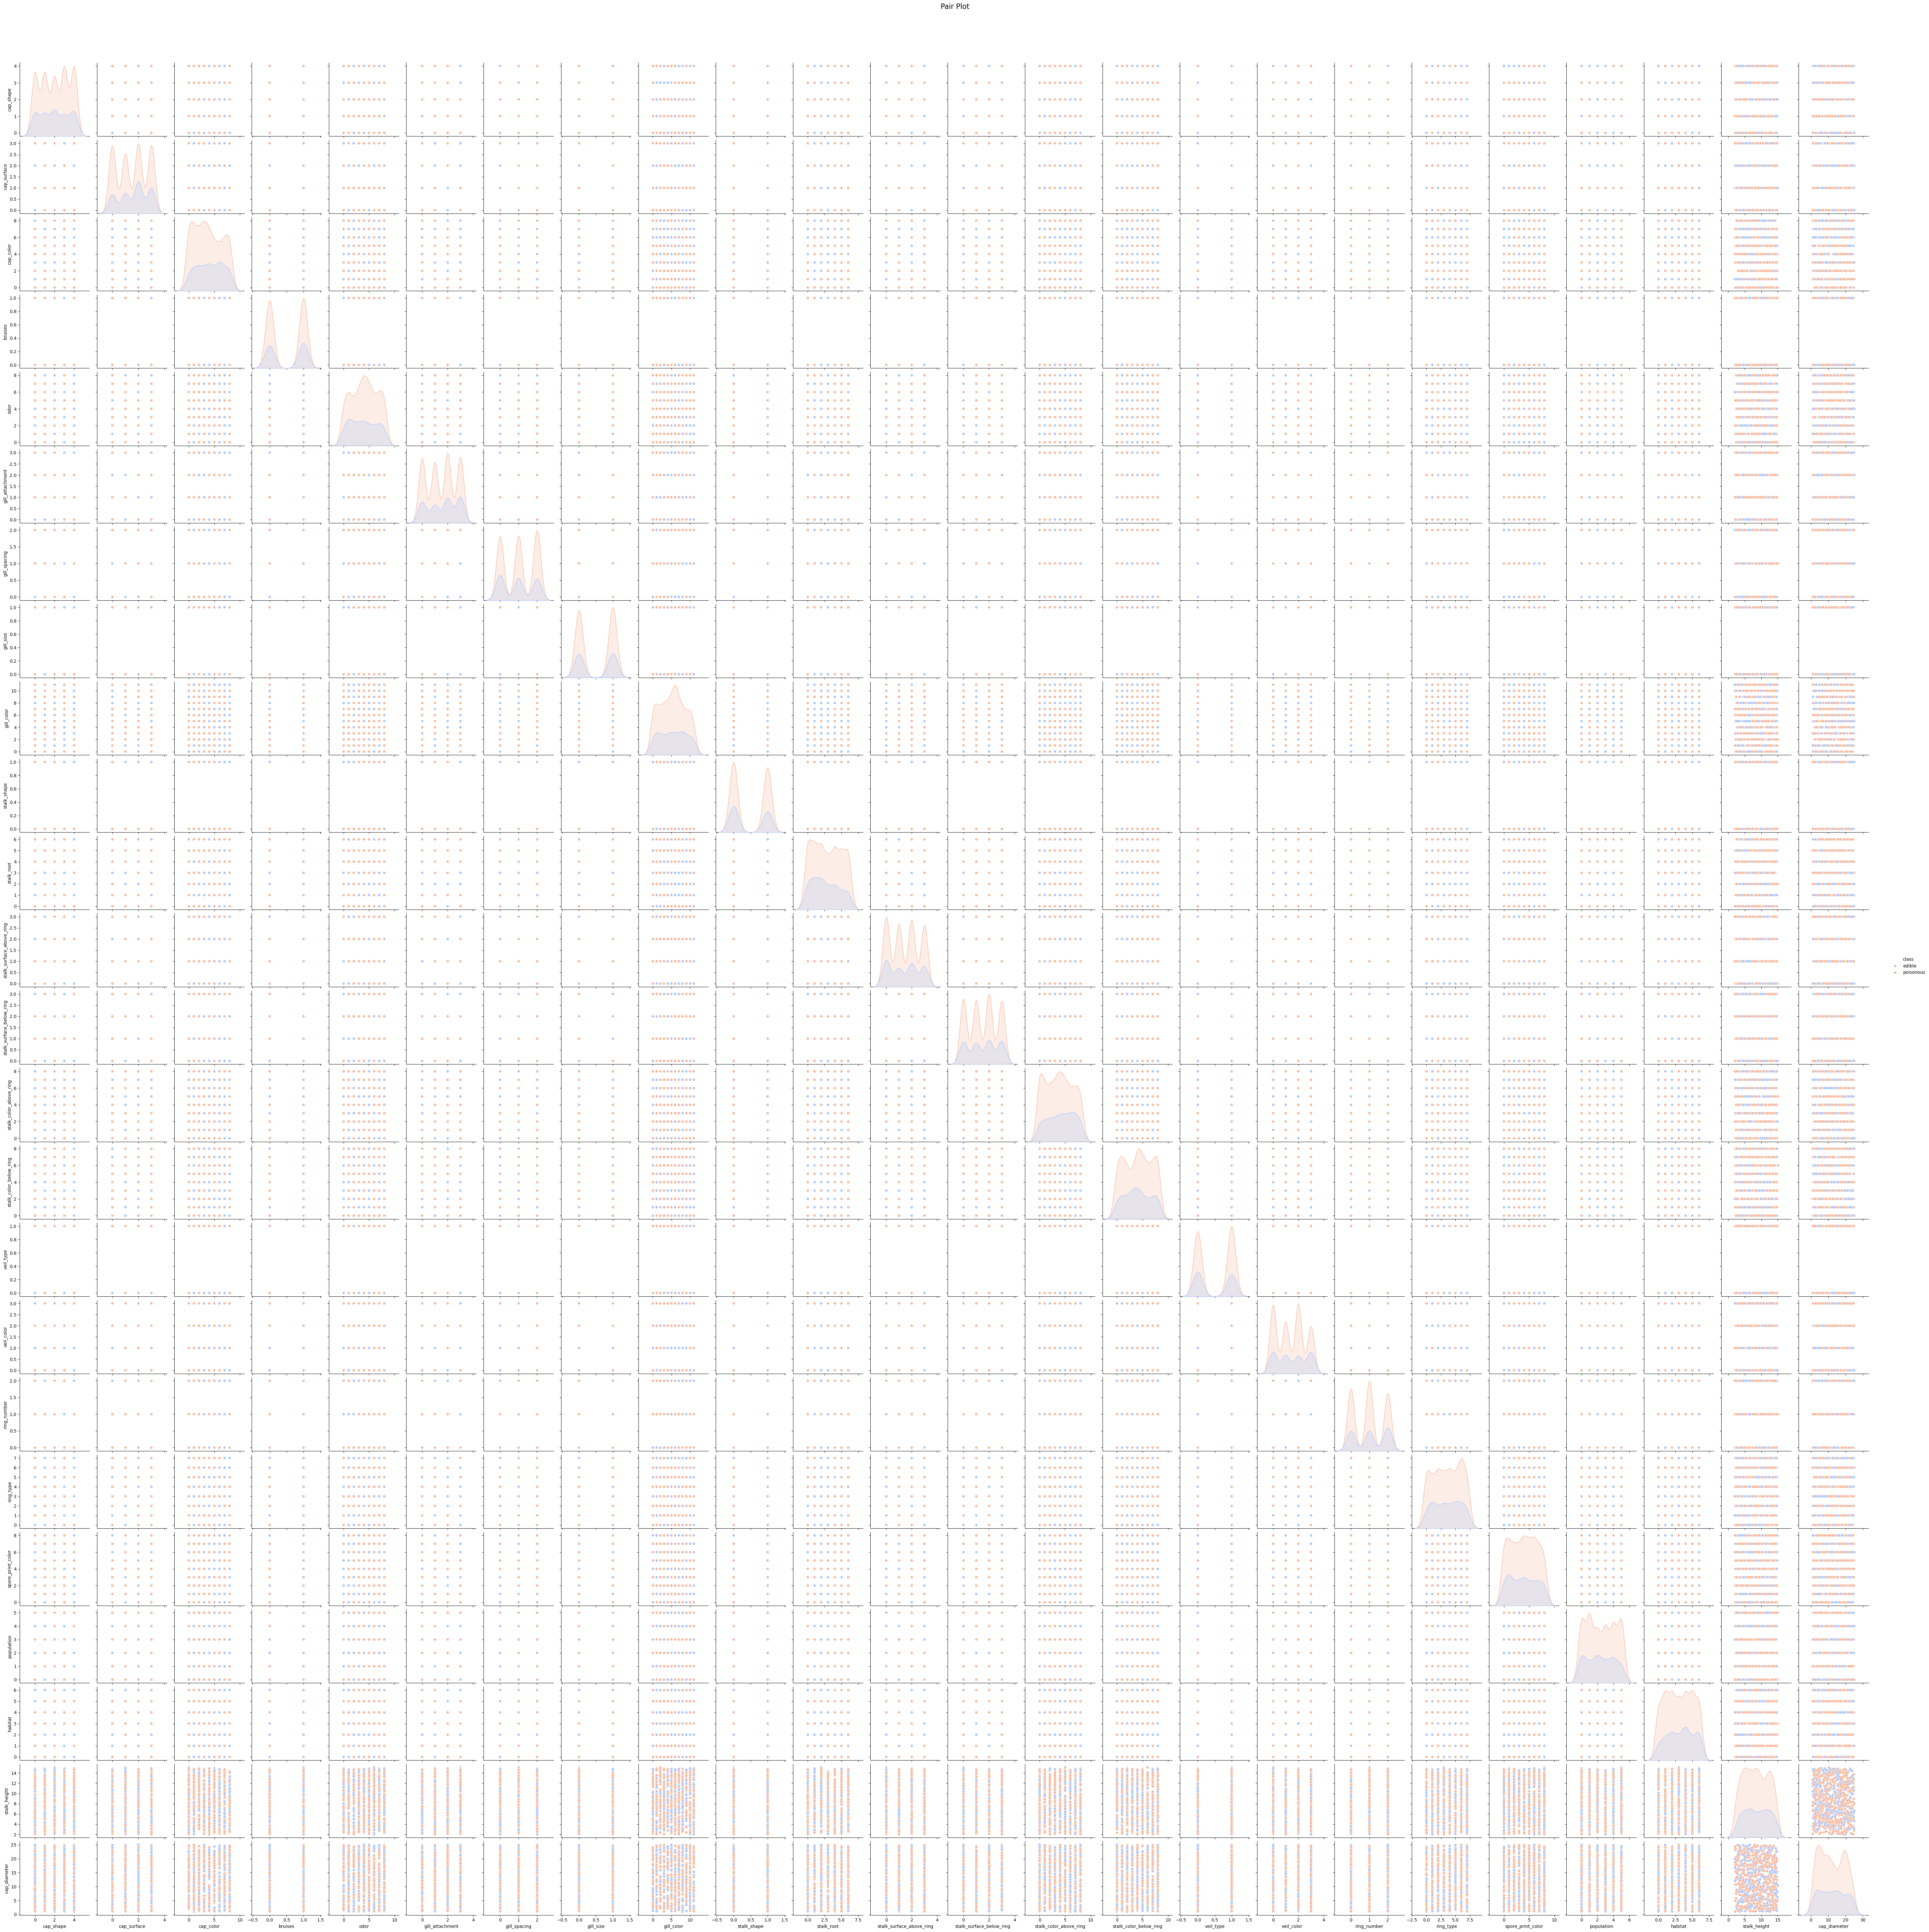

In [29]:
sns.pairplot(X_train.join(y_train), hue='class', palette='coolwarm')
plt.suptitle('Pair Plot', y=1.02, fontsize=16)
plt.show()

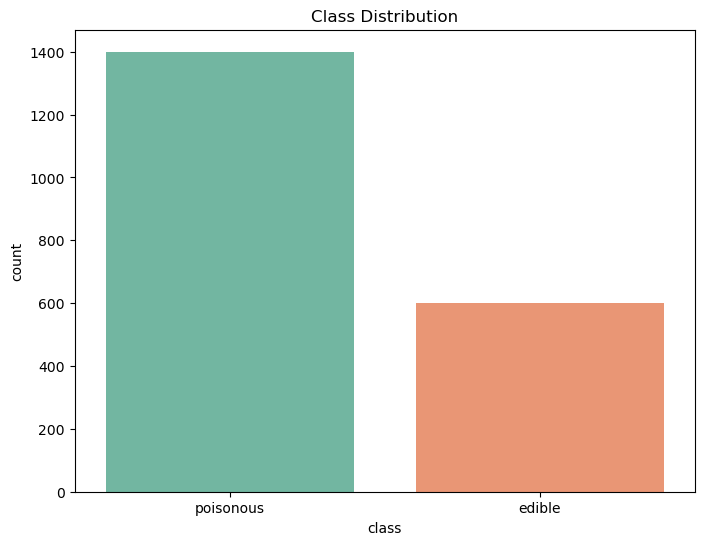

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y, hue=y, palette='Set2', legend=False)
plt.title('Class Distribution')
plt.show()

In [33]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', gamma='scale')

In [35]:
model.fit(X_train,y_train)
Y_pred_train =  model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the Model
accuracy = accuracy_score(y_test, Y_pred_test)
precision = precision_score(y_test, Y_pred_test, average='weighted', zero_division=1)
recall = recall_score(y_test, Y_pred_test, average='weighted', zero_division=1)
f1 = f1_score(y_test, Y_pred_test, average='weighted', zero_division=1)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6675
Precision: 0.7780562499999999
Recall: 0.6675
F1-score: 0.5344002998500749


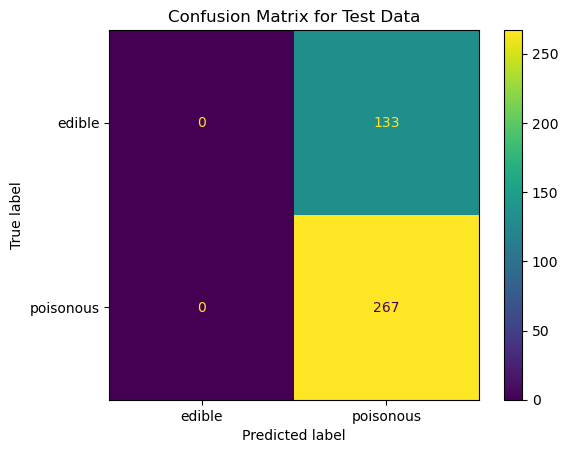

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'y_test' and 'Y_pred_test' are your true and predicted labels respectively
cm = confusion_matrix(y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix for Test Data')
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale

In [45]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_best, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_best, average='weighted', zero_division=1)

print("Accuracy (Best Model):", accuracy)
print("Precision (Best Model):", precision)
print("Recall (Best Model):", recall)
print("F1-score (Best Model):", f1)

Accuracy (Best Model): 0.885
Precision (Best Model): 0.8976437640029873
Recall (Best Model): 0.885
F1-score (Best Model): 0.8784114583333335


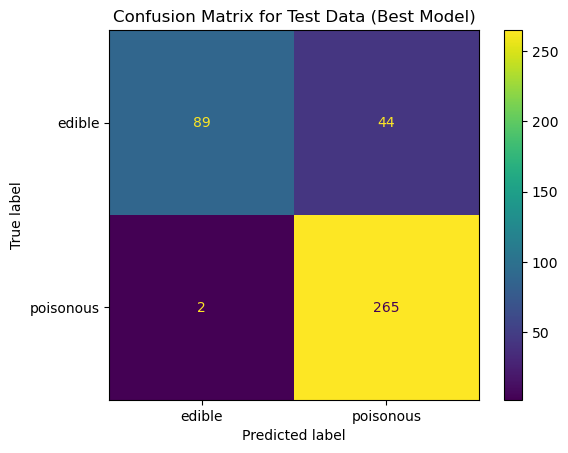

In [73]:
# Confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title('Confusion Matrix for Test Data (Best Model)')
plt.show()

In [75]:
from sklearn.metrics import classification_report

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    results.append({
        'Kernel': kernel,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)

    Kernel  Accuracy  Precision  Recall  F1-score
0   linear    0.6675   0.778056  0.6675  0.534400
1     poly    0.6925   0.789481  0.6925  0.589038
2      rbf    0.6675   0.778056  0.6675  0.534400
3  sigmoid    0.6150   0.599045  0.6150  0.605260
